 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_data.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_data.dropna(inplace=True)
whale_returns_data.drop_duplicates()
whale_returns_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_data.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_data.dropna(inplace=True)
algo_returns_data.drop_duplicates()
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history_data.sort_index()
sp500_history.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_data.dtypes
sp500_history_data.index

DatetimeIndex(['2019-04-23', '2019-04-22', '2019-04-18', '2019-04-17',
               '2019-04-16', '2019-04-15', '2019-04-12', '2019-04-11',
               '2019-04-10', '2019-04-09',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1649, freq=None)

In [10]:
# Fix Data Types
sp500_history
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "", regex=False)
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")


In [11]:
sp500_history.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ["SP500 Closing Price"]
sp500_returns

,SP500 Closing Price
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([sp500_returns, algo_returns_data, whale_returns_data], axis="columns", join="inner")
combined_data.sort_index(inplace=True)
combined_data.columns = ['SP', 'Algo1', 'Algo2', 'Soros', 'Paulson', 'Tiger', 'Berkshire']
combined_data.head()

,SP,Algo1,Algo2,Soros,Paulson,Tiger,Berkshire
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

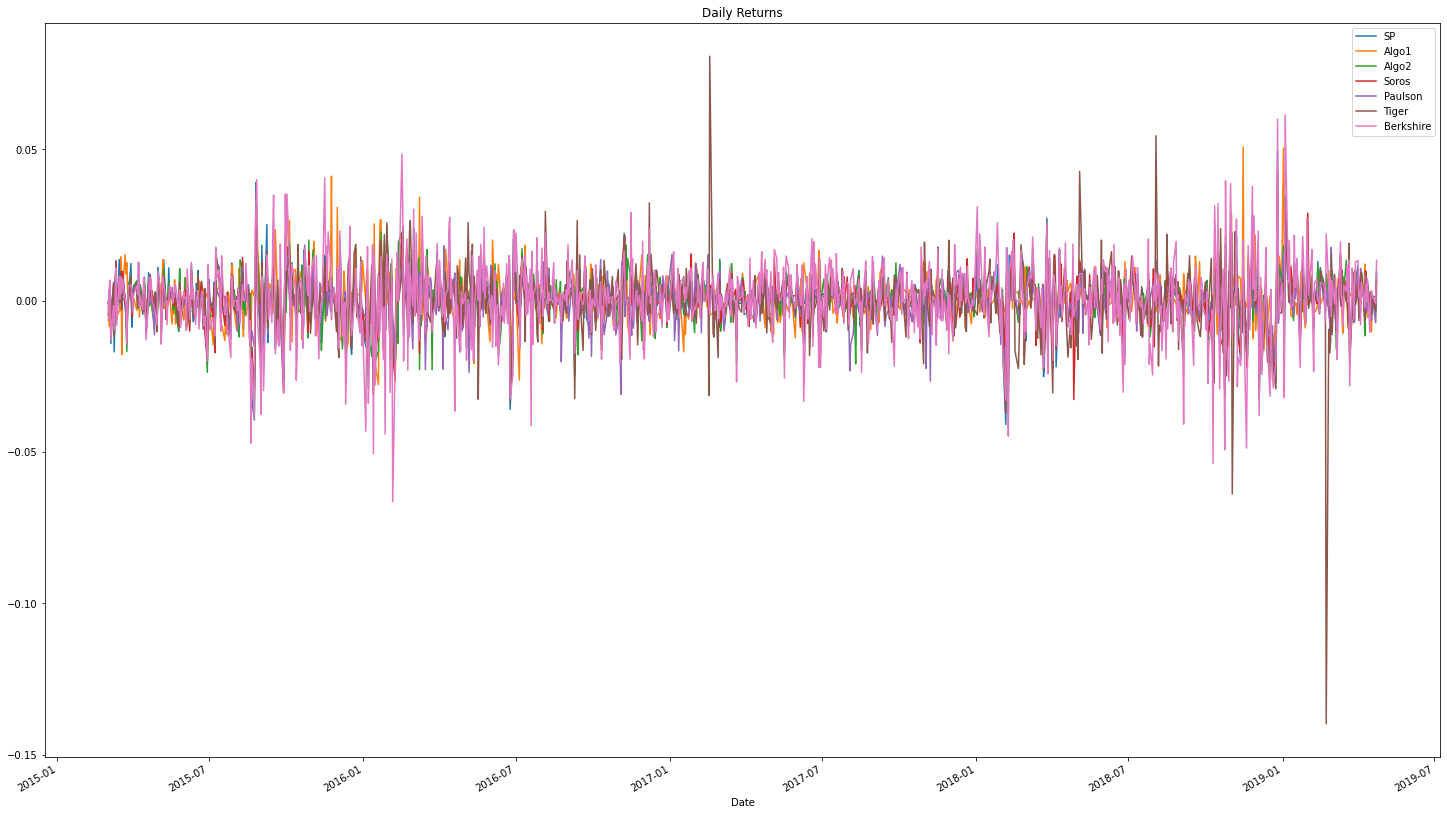

In [16]:
# Plot daily returns of all portfolios
combined_data.plot(figsize = (25,15), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() - 1
cumulative_returns

,SP,Algo1,Algo2,Soros,Paulson,Tiger,Berkshire
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008907,-0.010514,0.001464,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,-0.007722,-0.011459,0.005794,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.021786,-0.016359,-0.005733,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.017928,-0.021717,-0.004437,-0.002383,0.002951,-0.003367,-0.010466
...,...,...,...,...,...,...,...
2019-04-16,0.372945,0.944990,0.267768,0.160965,-0.213189,-0.137920,0.526861
2019-04-17,0.369823,0.924954,0.261140,0.157602,-0.218277,-0.141721,0.531781
2019-04-18,0.371986,0.923823,0.259590,0.159278,-0.217322,-0.141222,0.534716


<AxesSubplot:title={'center':'Cumulative Returns of Whales Over Time'}, xlabel='Date'>

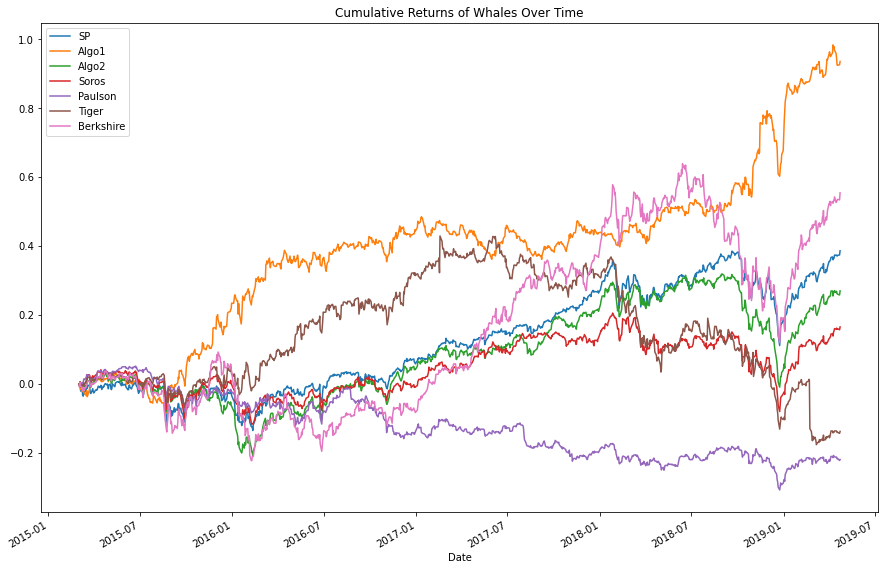

In [18]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns of Whales Over Time")

---

### Create a box plot for each portfolio
plt.boxplot(cumulate_returns) 

<AxesSubplot:>

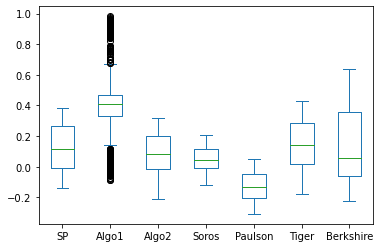

In [19]:
# Box plot to visually show risk
cumulative_returns.plot.box()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_dev = combined_data.std()
all_dev

SP           0.008554
Algo1        0.007620
Algo2        0.008342
Soros        0.007895
Paulson      0.007023
Tiger        0.010894
Berkshire    0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
SP_dev = combined_data['SP'].std()

# Determine which portfolios are riskier than the S&P 500
#A simple comparison using SP as the comparison to the others will give a true or false output
all_dev>SP_dev

SP           False
Algo1        False
Algo2        False
Soros        False
Paulson      False
Tiger         True
Berkshire     True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
#using Numpy to calculate based on 252 days, it could be used to annualize based on a quarterly 90 days as well
annualized_std = all_dev * np.sqrt(252)
annualized_std.head()


SP         0.135786
Algo1      0.120967
Algo2      0.132430
Soros      0.125335
Paulson    0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

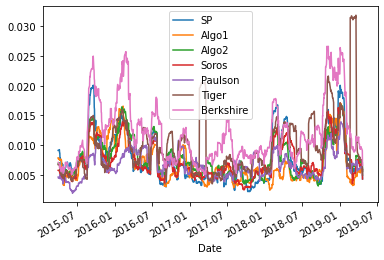

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
#Rolling Std Deviation can be helpful when looking for long term trends in a stock's characteristics through various economic cycles
combined_data.rolling(window=21).std().plot()



### Calculate and plot the correlation

,SP,Algo1,Algo2,Soros,Paulson,Tiger,Berkshire
SP,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
Soros,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
Paulson,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623


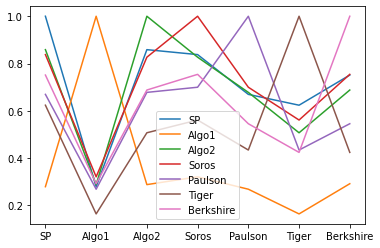

In [24]:
# Calculate the correlation
correlation = combined_data.corr()
correlation.plot()

# Display de correlation matrix
#This could also be presented as a heatmap
correlation.head()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [25]:
# Calculate covariance of a single portfolio
covariance_tiger = combined_data['Tiger'].cov(combined_data['SP'])
covariance_tiger

5.8141830323050785e-05

In [26]:
# Calculate variance of S&P 500
SP_variance = combined_data['SP']
SP_variance

Date
2015-03-03   -0.004539
2015-03-04   -0.004389
2015-03-05    0.001196
2015-03-06   -0.014174
2015-03-09    0.003944
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: SP, Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

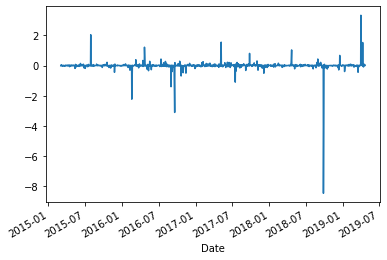

In [27]:
# Computing beta
Tiger_beta = covariance_tiger / SP_variance
Tiger_beta

# Plot beta trend
Tiger_beta.plot()

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger'}, xlabel='Date'>

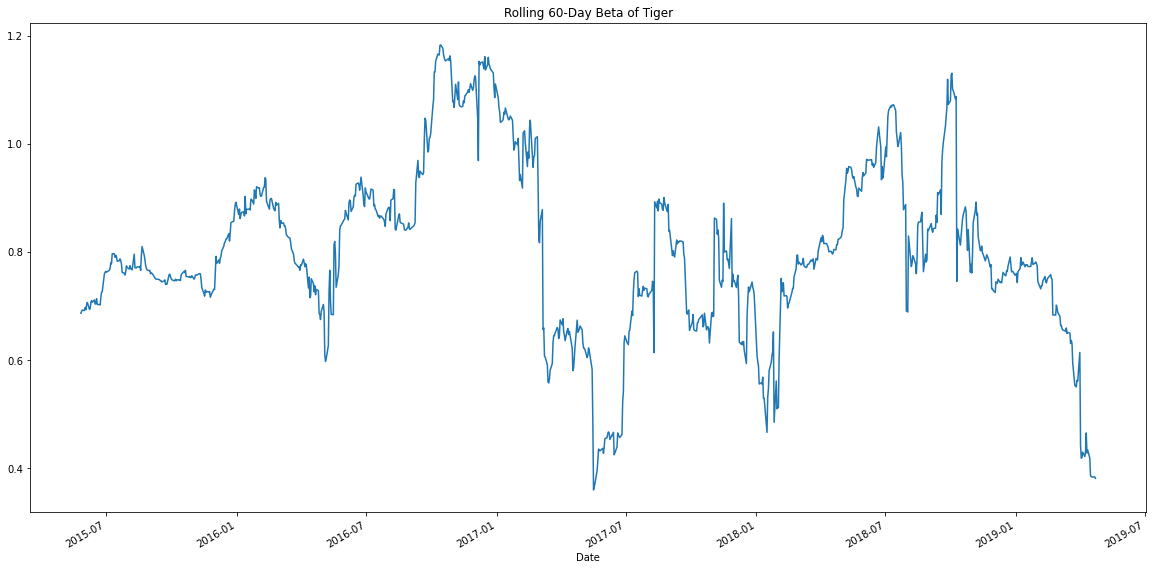

In [28]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500
rolling_covariance = combined_data['Tiger'].rolling(window=60).cov(combined_data['SP'])
rolling_variance = combined_data['SP'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Tiger')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [29]:
# Use `ewm` to calculate the rolling window
combined_data_ewm = combined_data.ewm(halflife=21).std()
combined_data_ewm

,SP,Algo1,Algo2,Soros,Paulson,Tiger,Berkshire
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.000106,0.004700,0.002380,0.002472,0.005814,0.001441,0.007624
2015-03-05,0.003294,0.004162,0.002662,0.002677,0.004968,0.002478,0.007020
2015-03-06,0.006498,0.003419,0.007166,0.005349,0.004615,0.004665,0.009387
2015-03-09,0.007083,0.002999,0.006290,0.004638,0.004471,0.005496,0.008066
...,...,...,...,...,...,...,...
2019-04-16,0.007837,0.006922,0.007938,0.007632,0.006846,0.016301,0.011939
2019-04-17,0.007736,0.007097,0.007896,0.007547,0.006846,0.016047,0.011746
2019-04-18,0.007610,0.006984,0.007779,0.007424,0.006737,0.015787,0.011554


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios 
sharpe_ratios = ((combined_data.mean()) * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SP           0.648267
Algo1        1.378648
Algo2        0.501364
Soros        0.356417
Paulson     -0.483570
Tiger       -0.121060
Berkshire    0.621810
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

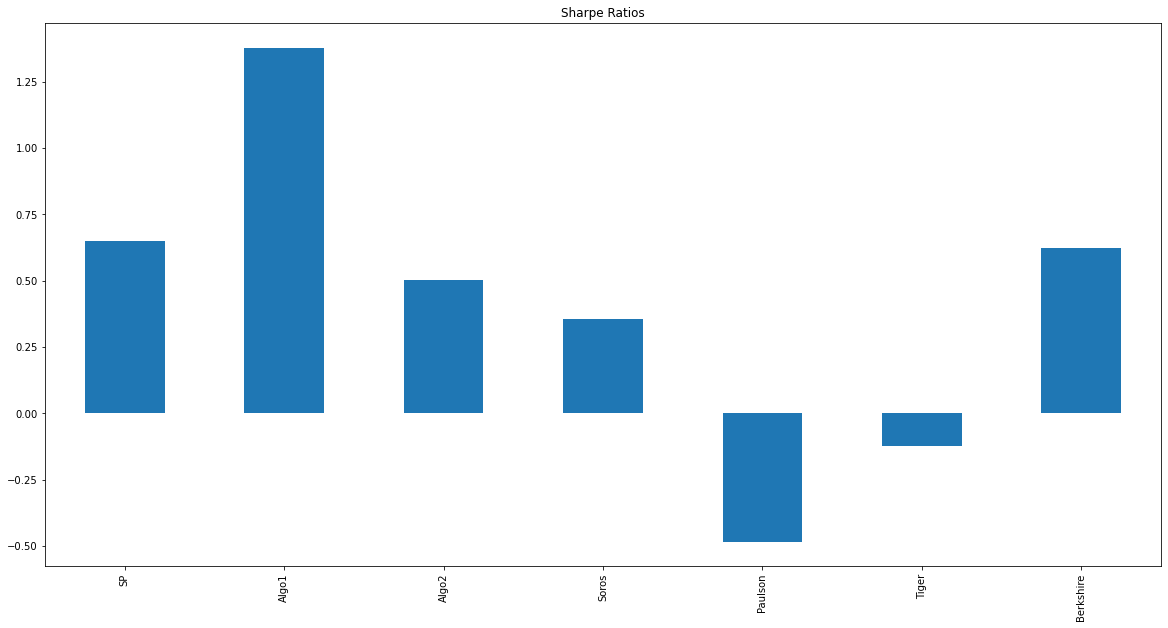

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

No the algorithmic strategies do not both outperform the S&P and whales.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data created from GoogleFinance in a csv file and include date column as the index
my_portfolio_path = Path("Resources/my_portfolio.csv")
my_portfolio_data = pd.read_csv(my_portfolio_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
my_portfolio_data.head()
 

,META,POOL,XOM
Date,,,
2016-06-10,332.46,429.00,62.75
2016-06-11,331.26,431.62,62.17
2016-06-12,336.77,430.96,62.07
2016-06-13,336.75,434.41,64.33
2016-06-14,331.08,432.52,64.10


In [33]:
#check the data types prior to doing any calculations
my_portfolio_data.dtypes
my_portfolio_data.index

DatetimeIndex(['2016-06-10', '2016-06-11', '2016-06-12', '2016-06-13',
               '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17',
               '2016-06-18', '2016-06-19',
               ...
               '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [34]:
#calculation the daily returns for each in the portfolio
daily_my_portfolio = my_portfolio_data.pct_change()
daily_my_portfolio.head()

,META,POOL,XOM
Date,,,
2016-06-10,NaN,NaN,NaN
2016-06-11,-0.003609,0.006107,-0.009243
2016-06-12,0.016633,-0.001529,-0.001608
2016-06-13,-0.000059,0.008005,0.036411
2016-06-14,-0.016837,-0.004351,-0.003575


In [35]:
daily_my_portfolio.dropna(inplace=True)
daily_my_portfolio.drop_duplicates()
daily_my_portfolio.head()

,META,POOL,XOM
Date,,,
2016-06-11,-0.003609,0.006107,-0.009243
2016-06-12,0.016633,-0.001529,-0.001608
2016-06-13,-0.000059,0.008005,0.036411
2016-06-14,-0.016837,-0.004351,-0.003575
2016-06-15,0.016401,0.009271,-0.032917


In [36]:
daily_my_portfolio.dtypes
daily_my_portfolio.index

DatetimeIndex(['2016-06-11', '2016-06-12', '2016-06-13', '2016-06-14',
               '2016-06-15', '2016-06-16', '2016-06-17', '2016-06-18',
               '2016-06-19', '2016-06-20',
               ...
               '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights to 1/3 each by number of shares, vs. by equal dollar amounts, so not as meaningful as if dollar amounts were equal.
weights = [1/3, 1/3, 1/3]
weighted_returns = daily_my_portfolio.dot(weights)
weighted_returns.head()
custom_portfolio = weighted_returns.to_frame()
custom_portfolio.columns = ["My Own"]
custom_portfolio.head()



,My Own
Date,
2016-06-11,-0.002248
2016-06-12,0.004499
2016-06-13,0.014785
2016-06-14,-0.008254
2016-06-15,-0.002415


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame in order to compare how My_Portfolio compares with it's returns unweighted to that of the other portfolios 

combined_data_new = pd.concat([sp500_returns, algo_returns_data, whale_returns_data, custom_portfolio], axis="columns", join="inner")
combined_data_new.head()

,SP500 Closing Price,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Own
Date,,,,,,,,
2016-06-13,-0.008115,-0.000433,-0.010482,-0.007235,0.000705,-0.005590,-0.002649,0.014785
2016-06-14,-0.001799,-0.004552,-0.002970,-0.004825,0.002466,-0.000772,-0.001768,-0.008254
2016-06-15,-0.001841,-0.001871,0.002348,0.003305,-0.006720,-0.000709,-0.005166,-0.002415
2016-06-16,0.003133,-0.002974,-0.001530,0.000070,-0.002727,0.004143,0.005737,-0.011143
2016-06-17,-0.003258,-0.005344,0.001288,-0.003619,-0.003006,-0.004458,-0.007596,0.022950


<AxesSubplot:xlabel='Date'>

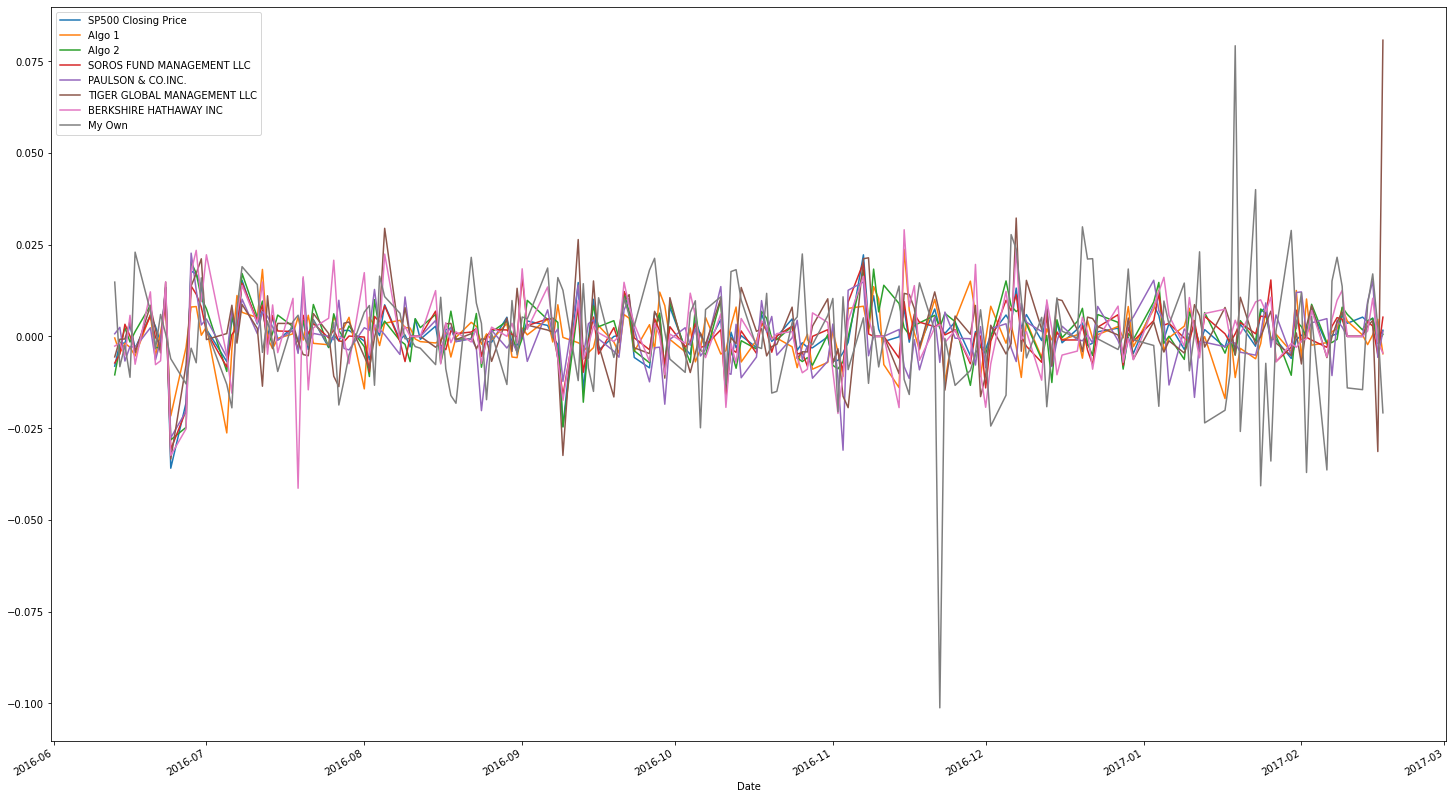

In [39]:
#since we only used one year of returns for our portfolio we drop na where no data exists
combined_data_new.dropna(inplace=True)
combined_data_new.plot(figsize=(25,15))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
# Calculate the annualized standard deviation (252 trading days)
#using Numpy to calculate based on 252 days, it could be used to annualize based on a quarterly 90 days as well
annualized_std_new = combined_data_new * np.sqrt(252)
annualized_std_new.head()

,SP500 Closing Price,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Own
Date,,,,,,,,
2016-06-13,-0.128825,-0.006867,-0.166395,-0.114846,0.011185,-0.088732,-0.042045,0.234713
2016-06-14,-0.028556,-0.072262,-0.047151,-0.076587,0.039140,-0.012250,-0.028071,-0.131036
2016-06-15,-0.029220,-0.029694,0.037277,0.052472,-0.106679,-0.011263,-0.082003,-0.038338
2016-06-16,0.049735,-0.047216,-0.024285,0.001119,-0.043287,0.065769,0.091072,-0.176889
2016-06-17,-0.051718,-0.084836,0.020453,-0.057455,-0.047722,-0.070768,-0.120582,0.364322


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

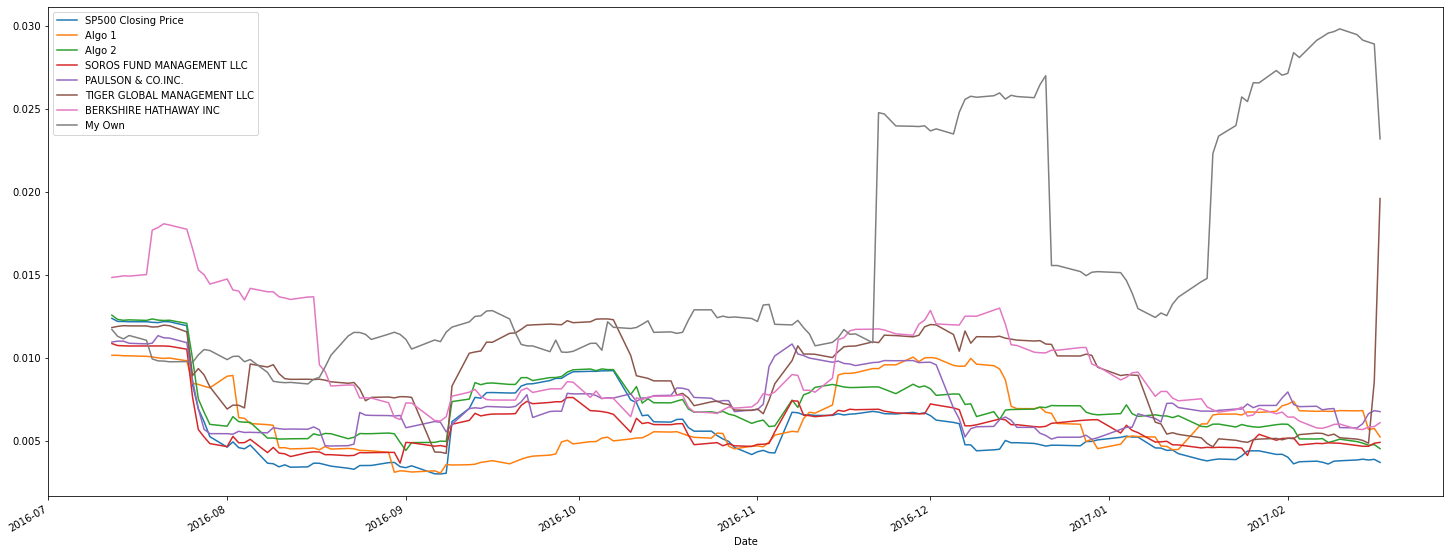

In [51]:
# Calculate rolling standard deviation
#Rolling Std Deviation can be helpful when looking for long term trends in a stock's characteristics through various economic cycles
combined_data_new.rolling(window=21).std().plot(figsize=(25,10))



### Calculate and plot the correlation

<AxesSubplot:>

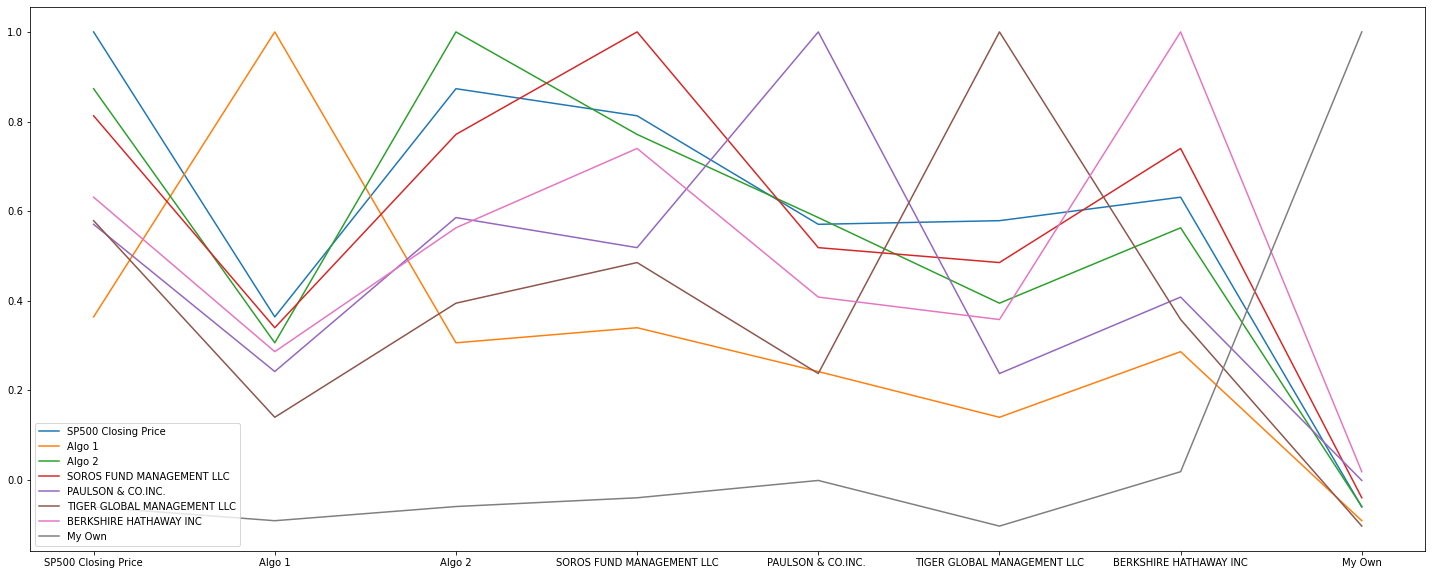

In [53]:
# Calculate and plot the correlation
correlation_new = combined_data_new.corr()
correlation_new.plot(figsize=(25,10))


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

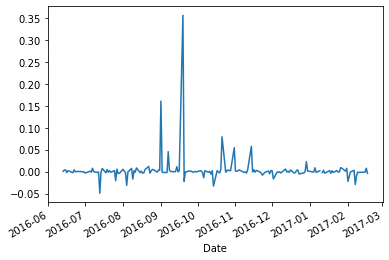

In [79]:
# Calculate and plot Beta
#before calculating the rolling 60 day we calculate first the covariance and beta of my portfolio
covariance_my_portfolio = custom_portfolio['My Own'].cov(combined_data_new['SP500 Closing Price'])
SP_variance_new = combined_data_new['SP500 Closing Price']
my_own_beta = covariance_my_portfolio / SP_variance_new
my_own_beta.plot()

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

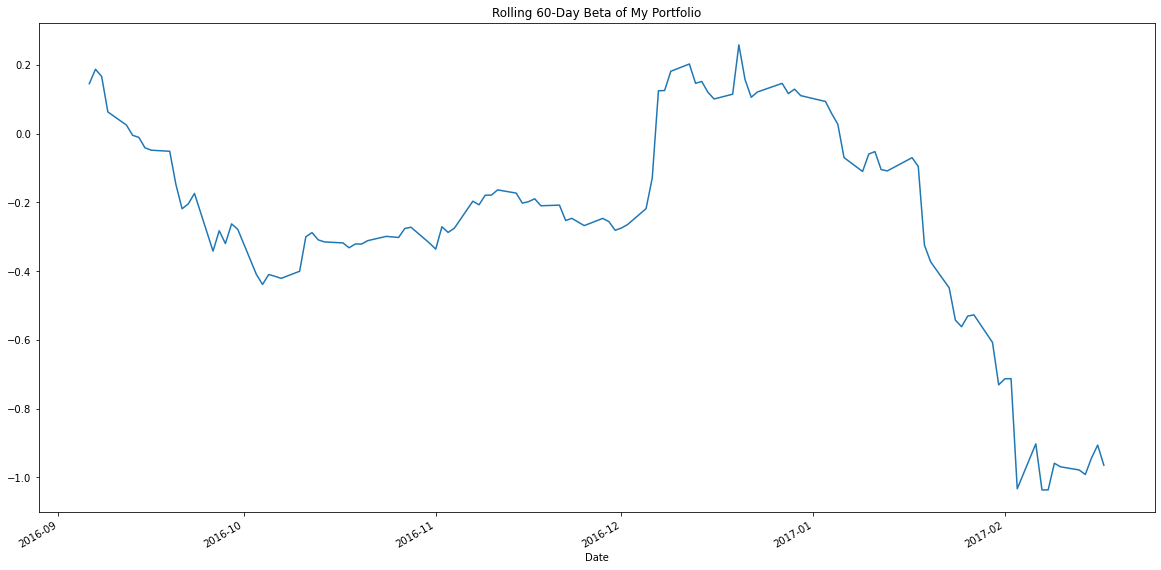

In [80]:
#then we calculate the rolling covariance of my portfolio
rolling_cov_new = combined_data_new['My Own'].rolling(window=60).cov(combined_data_new['SP500 Closing Price'])
rolling_var_new = combined_data_new['SP500 Closing Price'].rolling(window=60).var()
rolling_beta_new = rolling_cov_new / rolling_var_new
rolling_beta_new.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_new = ((combined_data_new.mean()) * 252) / (combined_data_new.std() * np.sqrt(252))
sharpe_ratios_new

SP500 Closing Price            1.652459
Algo 1                         0.892878
Algo 2                         1.978199
SOROS FUND MANAGEMENT LLC      1.305419
PAULSON & CO.INC.             -0.410731
TIGER GLOBAL MANAGEMENT LLC    1.650108
BERKSHIRE HATHAWAY INC         1.844213
My Own                         0.355361
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios with My Own'}>

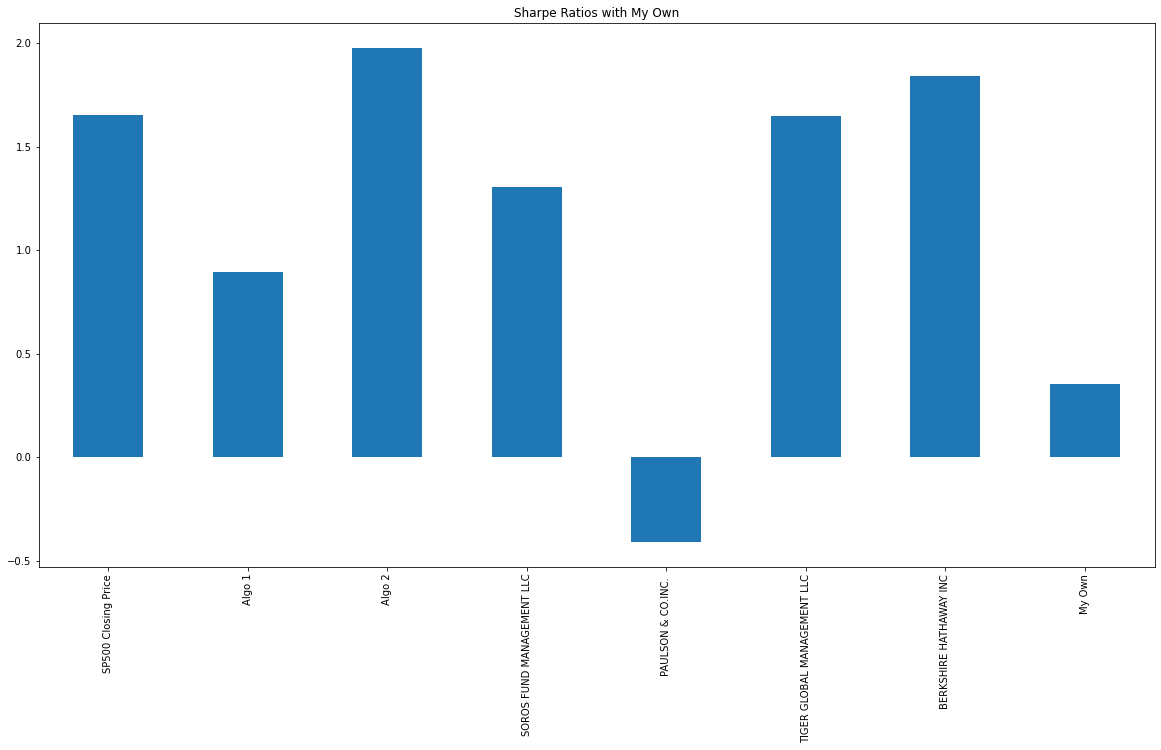

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios with My Own")

### How does your portfolio do?

Write your answer here!

In [ ]:
#My portfolio performed only adequately against all the others except for Paulson, which had a negative return during the timeframe it measured against My Own.